<a href="https://colab.research.google.com/github/Xahoor72/Medical-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Cost_Detection_LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score, roc_curve


Data collection and Analysis


In [25]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [26]:
insurance_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


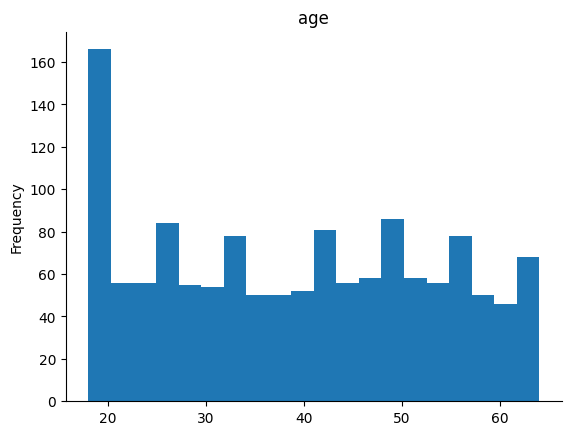

In [27]:
# @title age

#from matplotlib import pyplot as plt
insurance_dataset['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Charges Distribution')

<Figure size 600x600 with 0 Axes>

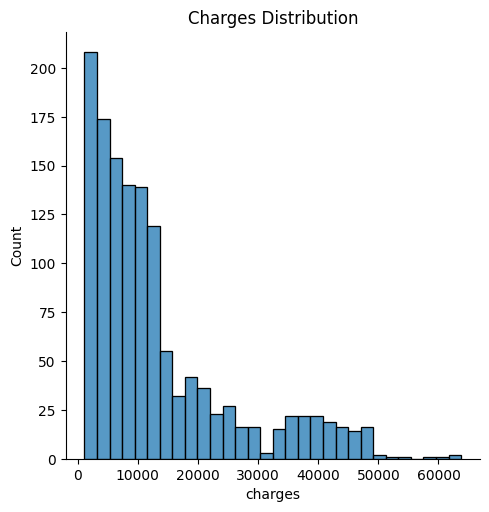

In [28]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
#plt.show()

In [29]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [30]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(Y_test)

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64


In [33]:
print(X.shape, X_train.shape, X_test.shape, type(Y_test))

(1338, 6) (1070, 6) (268, 6) <class 'pandas.core.series.Series'>


In [34]:
regressor =  RandomForestRegressor(random_state=42)

In [35]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [36]:
training_data_prediction =regressor.predict(X_train)


In [37]:
# R squared value
r2_train = r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.9772612152330278


In [38]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)
print(type(test_data_prediction.shape))



<class 'tuple'>


In [39]:
# R squared value
r2_score = r2_score(Y_test, test_data_prediction)
print( "R2 score  is {}".format(round(r2_score,2)))

R2 score  is 0.84


In [40]:
MAE =  mean_absolute_error(Y_test, test_data_prediction)
print( "MAE is {}".format(round(MAE,2)))

MAE is 2752.51


In [41]:
MSE = mean_squared_error(Y_test, test_data_prediction)
print( "MSE is {}".format(round(MSE,2)))

MSE is 24341319.03


In [42]:
RMSE = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("The Mean Absolute Error of our Model is {}".format(round(RMSE, 2)))

The Mean Absolute Error of our Model is 4933.69


In [43]:
actual_predicted_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': test_data_prediction
})

actual_predicted_df.head()

,Actual Values,Predicted Values
0,2395.17155,4865.175974
1,11286.53870,11993.124751
2,9617.66245,15708.324346
3,1719.43630,2728.721046
4,8891.13950,9390.158497


In [46]:

 cross_val_score(regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')


array([-20326532.25501674, -20255468.04133169, -24748516.02161198,
       -31592401.90400447, -20717324.09489924])

In [45]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3729.6420035]
The insurance cost is USD  3729.6420035000065


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


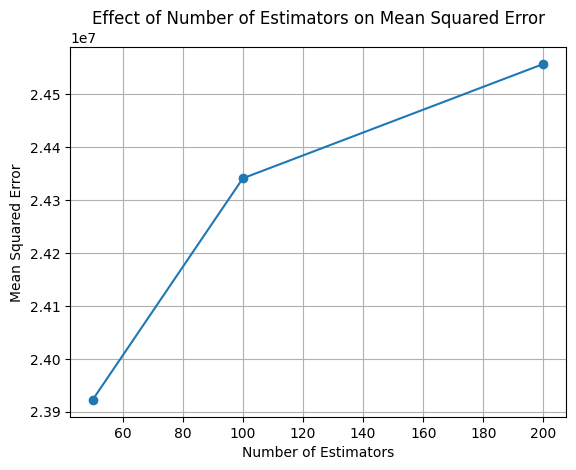

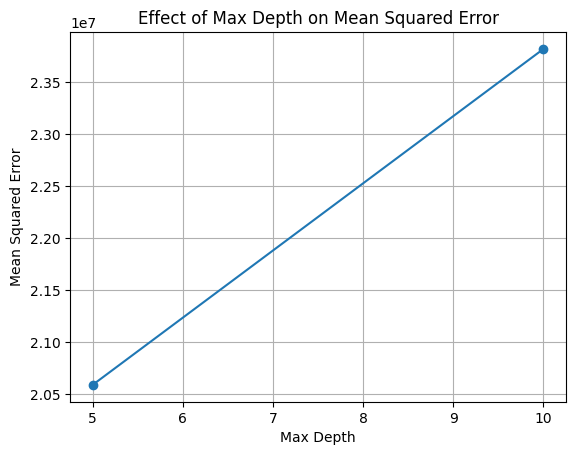

Best hyperparameters:
Number of Estimators: 50
Max Depth: 5


In [23]:
n_estimators = [50, 100, 200]
max_depth = [None, 5, 10]
y_val=Y_test
X_val=X_test
# Initialize lists to store results
losses_n_estimators = []
losses_max_depth = []

# Train and evaluate models with different hyperparameters
for n_estimator in n_estimators:
    model = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    losses_n_estimators.append(loss)

for depth in max_depth:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_val)
    loss = mean_squared_error(y_val, y_pred)
    losses_max_depth.append(loss)

# Plot loss graph for n_estimators
plt.plot(n_estimators, losses_n_estimators, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Number of Estimators on Mean Squared Error')
plt.grid(True)
plt.show()

# Plot loss graph for max_depth
plt.plot(max_depth, losses_max_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Max Depth on Mean Squared Error')
plt.grid(True)
plt.show()
best_n_estimator = n_estimators[losses_n_estimators.index(min(losses_n_estimators))]
best_max_depth = max_depth[losses_max_depth.index(min(losses_max_depth))]

print("Best hyperparameters:")
print(f"Number of Estimators: {best_n_estimator}")
print(f"Max Depth: {best_max_depth}")